# WeatherPy Analysis
----

There is relationship exists between latitude and the temprature, the more closer to the equator the higher temprature.
There is no strong relationship observed between latitude and humidity,
There is no strong relationship observed between latitude and cloudiness,
There is no strong relationship observed between latitude and windspeed,


In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
type(lat_range)

tuple

## Generate Cities List

In [26]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [27]:
#set up lists, URL 

city_list=[] 
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

#counts
number_counts = 0
set_counts = 1
city_counts = 0

#Loop through the cities to retrive needed information
print('Beginning Data Retrieval')
print("--------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_counts+=1
        number_counts+=1
        print(f"Processing Record {number_counts} of Set {set_counts} | {city}")
        if number_counts==50:
            set_counts+=1
            number_counts=0           
            time.sleep(10)
    except: 
        print(f"City not found. Skipping...{city}")

        
print(f"Total cities processed: {len(city_list)}")

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | nhulunbuy
Processing Record 7 of Set 1 | husavik
Processing Record 8 of Set 1 | praya
Processing Record 9 of Set 1 | trairi
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | meulaboh
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | samarai
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | waipawa
Processing Record 18 of Set 1 | gat
City not found. Skipping...nguiu
Processing Record 19 of Set 1 | sambava
Processing Record 20 of Set 1 | badou
Processing Record 21 of Set 1 | poum
Processing Record 22 of Set 1 | kudahuvadhoo
Processing Record 23 of Set 1

City not found. Skipping...ambodifototra
Processing Record 29 of Set 4 | carballo
Processing Record 30 of Set 4 | kokopo
Processing Record 31 of Set 4 | houma
Processing Record 32 of Set 4 | chokurdakh
Processing Record 33 of Set 4 | saint george
City not found. Skipping...umm ruwabah
Processing Record 34 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 35 of Set 4 | preston
Processing Record 36 of Set 4 | ostrovnoy
Processing Record 37 of Set 4 | bulgan
Processing Record 38 of Set 4 | hambantota
Processing Record 39 of Set 4 | dawson creek
Processing Record 40 of Set 4 | margate
Processing Record 41 of Set 4 | sayansk
Processing Record 42 of Set 4 | altay
Processing Record 43 of Set 4 | hasaki
Processing Record 44 of Set 4 | nara
Processing Record 45 of Set 4 | alofi
Processing Record 46 of Set 4 | cahors
Processing Record 47 of Set 4 | nishihara
Processing Record 48 of Set 4 | beringovskiy
Processing Record 49 of Set 4 | biloela
Processing Record 50 of Set 4 | pitimbu
Processin

Processing Record 9 of Set 8 | maputo
Processing Record 10 of Set 8 | rio grande
City not found. Skipping...bolungarvik
Processing Record 11 of Set 8 | tabas
Processing Record 12 of Set 8 | san patricio
Processing Record 13 of Set 8 | hirara
Processing Record 14 of Set 8 | berlevag
Processing Record 15 of Set 8 | richards bay
Processing Record 16 of Set 8 | saint-georges
Processing Record 17 of Set 8 | hervey bay
Processing Record 18 of Set 8 | hofn
City not found. Skipping...andenes
Processing Record 19 of Set 8 | geraldton
Processing Record 20 of Set 8 | alfenas
Processing Record 21 of Set 8 | deputatskiy
Processing Record 22 of Set 8 | goes
Processing Record 23 of Set 8 | sault sainte marie
Processing Record 24 of Set 8 | kankakee
Processing Record 25 of Set 8 | rijeka
Processing Record 26 of Set 8 | vysokogornyy
Processing Record 27 of Set 8 | olinda
Processing Record 28 of Set 8 | manzanillo
Processing Record 29 of Set 8 | ewo
Processing Record 30 of Set 8 | hamilton
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
#set all data to a dataframe
weatherpy_df=pd.DataFrame({"City":city_list,
                           "Cloudiness":cloudiness,
                           "Country":country,
                           "Date":date,
                           "Humidity":humidity,
                           "Lat":lat,
                           "Lng":lng,
                           "Max Temp":max_temp,
                           "Wind Speed":wind_speed})
weatherpy_df.head()



,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yellowknife,20,CA,1571615933,74,62.45,-114.38,28.40,6.93
1,Longyearbyen,75,NO,1571615933,66,78.22,15.63,14.00,6.93
2,Rikitea,100,PF,1571615933,71,-23.12,-134.97,70.13,14.54
3,Qaanaaq,0,GL,1571615933,46,77.48,-69.36,1.35,10.16
4,Punta Arenas,0,CL,1571615933,61,-53.16,-70.91,46.40,18.34


In [29]:
#create CSV
weatherpy_df.to_csv("Output/weatherpy_df.csv", index=False, header=True)

weatherpy_df.count()

City          527
Cloudiness    527
Country       527
Date          527
Humidity      527
Lat           527
Lng           527
Max Temp      527
Wind Speed    527
dtype: int64

In [30]:
weatherpy_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yellowknife,20,CA,1571615933,74,62.45,-114.38,28.40,6.93
1,Longyearbyen,75,NO,1571615933,66,78.22,15.63,14.00,6.93
2,Rikitea,100,PF,1571615933,71,-23.12,-134.97,70.13,14.54
3,Qaanaaq,0,GL,1571615933,46,77.48,-69.36,1.35,10.16
4,Punta Arenas,0,CL,1571615933,61,-53.16,-70.91,46.40,18.34
5,Nhulunbuy,20,AU,1571615934,55,-12.18,136.78,86.00,10.29
6,Husavik,96,CA,1571615934,75,50.56,-96.99,51.01,6.13
7,Praya,40,ID,1571615934,74,-8.71,116.27,82.40,6.93
8,Trairi,92,BR,1571615934,88,-3.28,-39.27,73.80,4.03
9,Albany,90,US,1571615934,87,42.65,-73.75,51.01,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

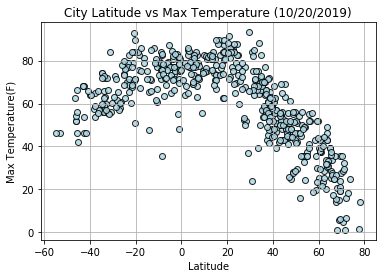

In [31]:
plt.scatter(lat, max_temp, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.85)

plt.title("City Latitude vs Max Temperature (10/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid()
plt.savefig("Latitude_vs_Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

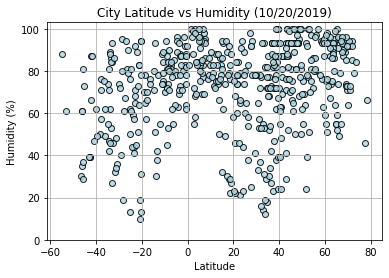

In [37]:
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.85)

plt.title("City Latitude vs Humidity (10/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0,103)
plt.grid()
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

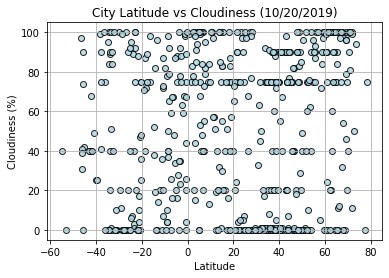

In [33]:
plt.scatter(lat, cloudiness, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.85)

plt.title("City Latitude vs Cloudiness (10/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

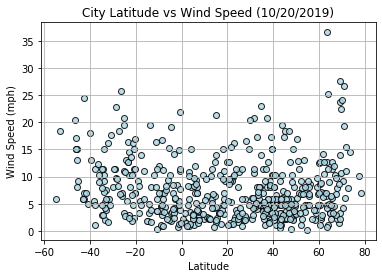

In [34]:
plt.scatter(lat, wind_speed, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.85)

plt.title("City Latitude vs Wind Speed (10/20/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("Latitude_vs_Wind Speed.png")
plt.show()